# Initial Data Analysis
This notebook explores the training data by providing insights on comment length and label distributions.
- Histogram of Comment Length
- Average Comment Length
- Label Distribution

In [1]:
import pandas as pd
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train = pd.read_csv('data/train.csv')

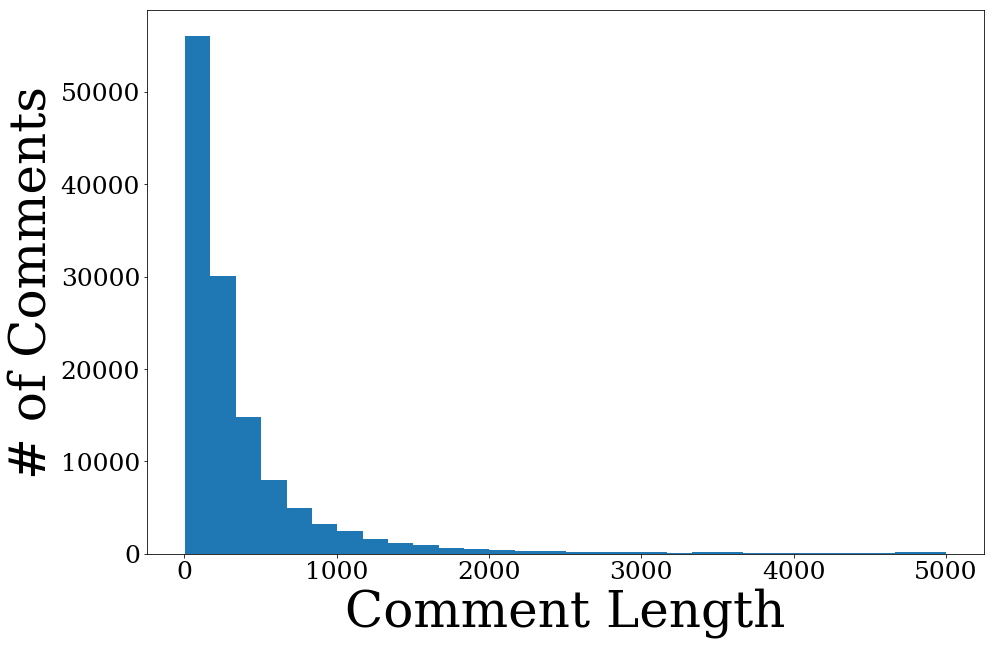

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
params = {'font.family': 'serif',
          'legend.fontsize': 'x-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'
plt.rcParams.update(params)

# add length field
train["comment_length"] = train["comment_text"].apply(len)

f = plt.figure(figsize=(15, 10))
plt.hist(train["comment_length"], bins=30)
plt.xlabel('Comment Length', size = 50)
plt.ylabel('# of Comments', size = 50);
plt.xticks(size = 25)
plt.yticks(size = 25)
f.savefig("visuals/comment-len-hist.pdf")

In [55]:
import numpy as np
print("Average Comment Length: ", np.average(train["comment_length"]))

Average Comment Length:  394.157705082


In [74]:
# add a none label for comments with no toxicity
train["none"] = 0
train.loc[train.query('toxic==0 and severe_toxic==0 and insult==0 and identity_hate==0 and obscene==0 and threat==0').index.get_values()]["none"] = 1

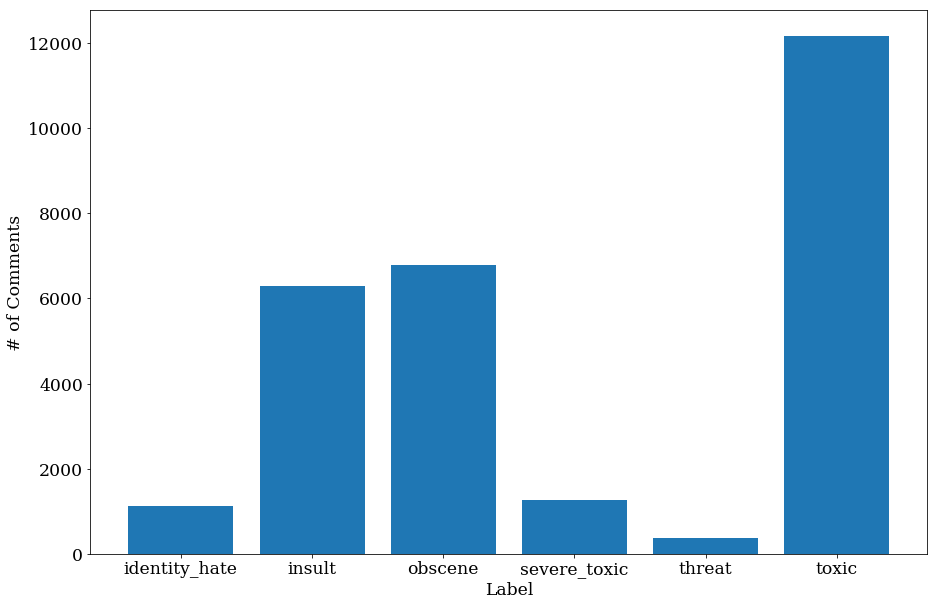

In [82]:
label_counts = [np.sum(train[label]) for label in labels] # + none

f = plt.figure(figsize=(15, 10))
plt.xlabel('Label')
plt.ylabel('# of Comments');
plt.bar(labels,label_counts)
f.savefig("visuals/label-dist.pdf")

In [46]:
print ("Label, Average Length")
for label,label_count in zip(labels,label_counts):
    print (label,np.average(train[train[label] == 1]["comment_length"]))

Label, Average Length
toxic 292.428125257
severe_toxic 443.017336485
obscene 283.335300192
threat 303.878706199
insult 274.584232234
identity_hate 304.359540636


In [48]:
train[train[labels] == 0].dropna()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
0,0b1bb1d10fb89170,"""\n\nA Blog Or Not a Blog, that is the questio...",0,0,0,0,0,0,2046
1,58a74782595bebd0,"""\n\n Small request \n\nBlack Kite, I have a s...",0,0,0,0,0,0,430
2,18675397184ed7b9,Adding new info \n\nI seem to have been the on...,0,0,0,0,0,0,419
3,f5ed20f5049b7ffa,"""\n\nTheir talk page is at User talk:Canoe1967...",0,0,0,0,0,0,466
4,4cfaf25a480ac018,"""Thank you for experimenting with the page Ton...",0,0,0,0,0,0,327
5,e41ec18179c60b88,"""\n\nThe BNP aren't """"neo-fascist"""", and anyon...",0,0,0,0,0,0,256
6,bb74ae9e0198a5d9,"By the way, Don't Change the table on the actu...",0,0,0,0,0,0,72
7,54da2d3b2fd85245,What source is anti-Jewish? Please clarify. Bh...,0,0,0,0,0,0,57
8,53d5d58a409517f4,that it was first invented in China,0,0,0,0,0,0,35
9,6b387f5f41db5eb6,I think I have as much consensus now as I'm li...,0,0,0,0,0,0,185
